# Descriptive Stats + Visualizations

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [265]:
df = pd.read_csv('./Data/Questions_Final.csv')
df = df.drop('Reverse Coded', axis=1)
print(df.shape)
df.head(10)

(458, 6)


,ID,Scale,Year of Publication,Nickname,Factor,Question Text
0,1,Conformity to Masculine Norms Inventory,2003,CMNI,Emotional Control,It is best to keep your emotions hidden
1,2,Conformity to Masculine Norms Inventory,2003,CMNI,Winning,In general‚ I will do anything to win
2,3,Conformity to Masculine Norms Inventory,2003,CMNI,Playboy,If I could‚ I would frequently change sexual p...
3,4,Conformity to Masculine Norms Inventory,2003,CMNI,Violence,If there is going to be violence‚ I find a way...
4,5,Conformity to Masculine Norms Inventory,2003,CMNI,Disdain for Homosexuals,It is important to me that people think I am h...
5,6,Conformity to Masculine Norms Inventory,2003,CMNI,Dominance,In general‚ I must get my way
6,7,Conformity to Masculine Norms Inventory,2003,CMNI,Pursuit of Status,Trying to be important is the greatest waste o...
7,8,Conformity to Masculine Norms Inventory,2003,CMNI,Primacy of Work,I am often absorbed in my work
8,9,Conformity to Masculine Norms Inventory,2003,CMNI,Power Over Women,I will only be satisfied when women are equal ...
9,10,Conformity to Masculine Norms Inventory,2003,CMNI,Self-reliance,I hate asking for help


## Table of Measures with Descriptive Statistics

In [285]:
result = df.groupby(['Scale', 'Year of Publication']).agg(
    N_Questions=('ID', 'count'),  # Count the number of rows for each 'Scale'
    Factors=('Factor', lambda x: list(x.unique()))  # List unique factors for each 'Scale'
).reset_index()

result.to_csv('descriptive_questions_df.csv', index=False)

## Histograms for Surveys' Number of Questions

In [236]:
# Create Table that indicates number of questions for each instrument
grouped = df.groupby('Nickname')['Nickname'].count().reset_index(name='# of Questions')
print(grouped)

   Nickname  # of Questions
0     AMIRS              11
1       AMS              32
2    BMS-SF              58
3      CMNI              94
4     M2PIN              10
5      MAMS              27
6      MANI              40
7        MM              20
8      MMIS              35
9      MRAS               8
10   MRNI-A              43
11   MRNI-R              49
12     MRNS              26
13     TAAM               5


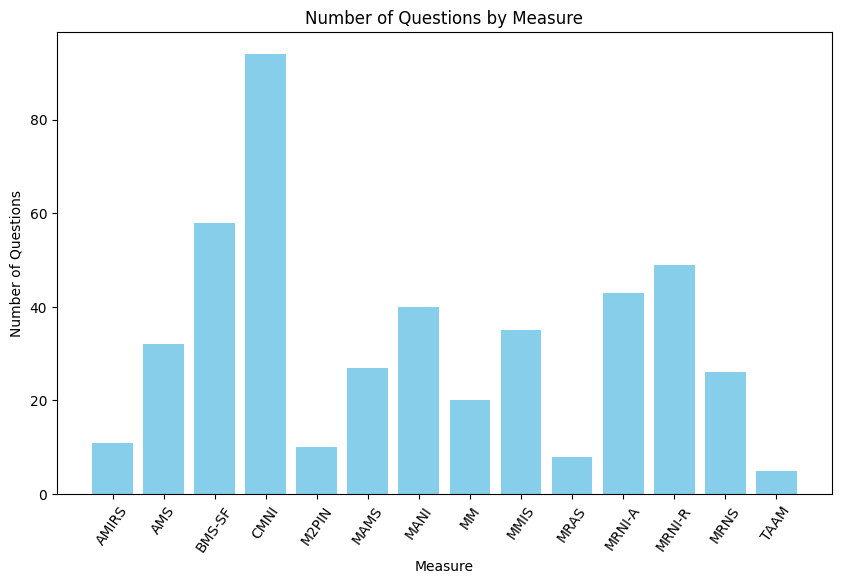

In [258]:
# Now, plot a histogram of these frequencies
plt.figure(figsize=(10, 6))
plt.bar(grouped['Nickname'], grouped['# of Questions'], color='skyblue')
plt.xlabel('Measure')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Measure')
plt.xticks(rotation=55)  # Rotate names for better readability if needed
plt.savefig('number_questions_by_instrument_bar_plots.png', dpi=300)
plt.show()

In [238]:
# Get descriptive statistics on the number of questions
grouped['# of Questions'].describe()

count    14.000000
mean     32.714286
std      23.908250
min       5.000000
25%      13.250000
50%      29.500000
75%      42.250000
max      94.000000
Name: # of Questions, dtype: float64

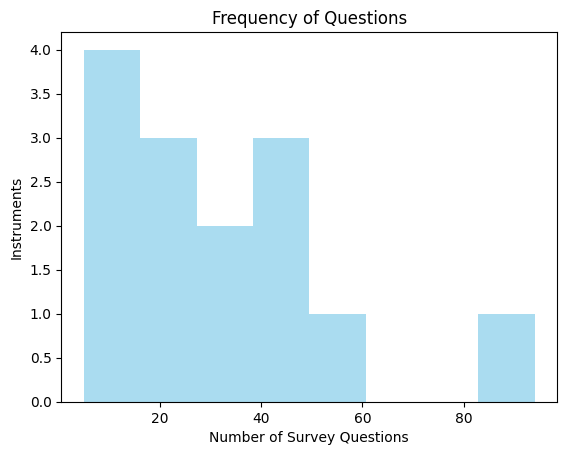

In [239]:
# Create a histogram that groups 
plt.hist(grouped['# of Questions'], bins=8, alpha=0.7, color='skyblue')
plt.title('Frequency of Questions')
plt.xlabel('Number of Survey Questions')
plt.ylabel('Instruments')
# Show the plot
plt.show()

## Histogram for Surveys' Number of Questions (Grouped by Factor)

In [240]:
# Split the "Factor" column and flatten the list
factors = df['Factor'].dropna().str.lower().str.strip().apply(lambda x: x.split('/')).explode()

factors = factors.str.strip()

# View the first few entries to verify
print(factors.head())

0          emotional control
1                    winning
2                    playboy
3                   violence
4    disdain for homosexuals
Name: Factor, dtype: object


In [244]:
# Count each unique value's frequency
factor_counts = Counter(factors)

# Convert the Counter object to a DataFrame
frequency_table = pd.DataFrame(list(factor_counts.items()), columns=['Factor', 'Frequency'])
# Sort the DataFrame by the 'Factor' column
sorted_frequency_table = frequency_table.sort_values(by='Factor').reset_index(drop=True)
# View the frequency table
print(sorted_frequency_table)

df.to_csv('factor_groupings.csv')

                                     Factor  Frequency
0                               achievement          8
1                    achievement and status          8
2                                aggression          8
3                           anti-femininity          9
4                   avoidance of femininity         18
5                              caballerismo         10
6                           constant effort          7
7                                   control         13
8                   disdain for homosexuals         10
9                                 dominance         11
10                        emotional control         21
11                    emotional restriction          7
12                             heterosexism          8
13                 hypermasculine posturing         13
14                        importance of sex          4
15                                 machismo         10
16                  marriage and parenthood         13
17      ne

In [245]:
# Now we should group them using qualitative knowledge?
group_mapping = {
    'restrictive emotionality': 'Emotional Restriction',
    'emotional restriction':'Emotional Restriction',
    'emotional control':'Emotional Restriction',
    'toughness': 'Toughness',
    'anti-femininity': 'Anti-Femininity',
    'avoidance of femininity': 'Anti-Femininity',
    'power over women': 'Anti-Femininity',
    'control': "Self-Reliance",
    'self-reliance': "Self-Reliance",
    'self-reliance through mechanical skills': "Self-Reliance",
    'status': 'Status',
    'pursuit of status': 'Status',
    'achievement':'Status',
    'achievement and status':'Status',
    'work': 'Work',
    'primacy of work': 'Work',
    'violence': 'Aggression',
    'aggression': 'Aggression',
    'winning':'Winning',
    'constant effort':'Winning',
    'heterosexism':'Heterosexism',
    'disdain for homosexuals':'Heterosexism',
    'negativity toward sexual minorities':'Heterosexism',
    'importance of sex':'Importance of Sex',
    'playboy':'Importance of Sex',
    'readiness for sex':'Importance of Sex',
    'sexual responsibility':'Importance of Sex',
    'sexuality':'Importance of Sex',
}

grouped_factors = factors.map(group_mapping).fillna('Other')
# Count the frequency of each grouped value
grouped_factor_counts = Counter(grouped_factors)

# Create a DataFrame from the counter
grouped_frequency_table = pd.DataFrame(list(grouped_factor_counts.items()), columns=['Grouped Factor', 'Frequency'])

# Sort the DataFrame
sorted_grouped_frequency_table = grouped_frequency_table.sort_values(by='Grouped Factor').reset_index(drop=True)

# Display the sorted table
print(sorted_grouped_frequency_table)

           Grouped Factor  Frequency
0              Aggression         16
1         Anti-Femininity         36
2   Emotional Restriction         54
3            Heterosexism         28
4       Importance of Sex         36
5                   Other        112
6           Self-Reliance         30
7                  Status         36
8               Toughness         25
9                 Winning         17
10                   Work         12


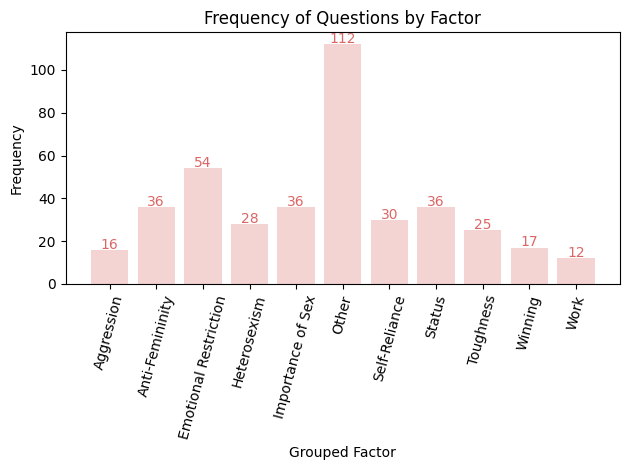

In [295]:
fig, ax = plt.subplots()

# Plotting the bar chart with color
ax.bar(sorted_grouped_frequency_table['Grouped Factor'], sorted_grouped_frequency_table['Frequency'], color='#f4d3d3')

# Adding title and labels
ax.set_title('Frequency of Questions by Factor')
ax.set_xlabel('Grouped Factor')
ax.set_ylabel('Frequency')

# Adding text labels above the bars
for i, v in enumerate(sorted_grouped_frequency_table['Frequency']):
    ax.text(i, v + 0.5, str(v), color='#dc6666', ha='center')

# Display the plot
plt.xticks(rotation=75)  # Rotate names for better readability
plt.tight_layout()
plt.savefig('frequency_questions_by_factor_bar_plots.png')
plt.show()

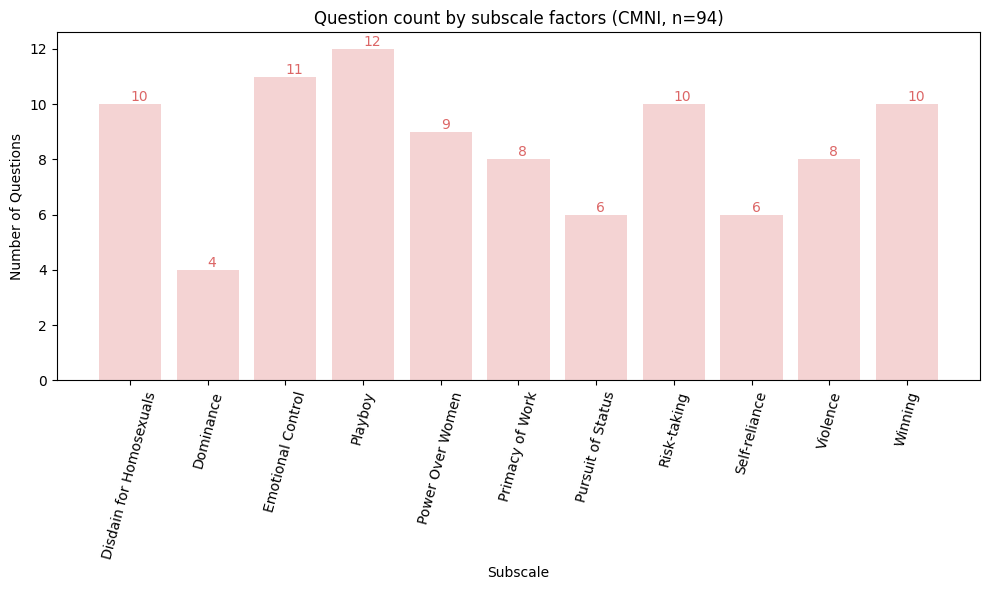

In [318]:
# Filter rows where Scale is "Conformity to Masculine Norms Inventory"
filtered_df = df[df["Scale"] == "Conformity to Masculine Norms Inventory"]

# Group by 'Factor' and count occurrences
grouped_df = filtered_df.groupby('Factor').size().reset_index(name='Count')

# Sort the DataFrame by 'Factor' alphabetically
sorted_df = grouped_df.sort_values('Factor')

# Plotting with text labels above the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_df['Factor'], sorted_df['Count'], color='#f4d3d3')
plt.xlabel('Subscale')
plt.ylabel('Number of Questions')
plt.title('Question count by subscale factors (CMNI, n=94)')

# Adding text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', color='#dc6666')  # va: vertical alignment

plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('./Visualizations/cmni_factor_freqs.png', dpi=100)
plt.show()